In [48]:
pd.set_option("display.max_columns", None)
pd.options.display.width = 0

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [50]:
# point to correct diretory for the following file
laptimes = pd.read_csv('lapTimes.csv',index_col=0)
laptimes


,driverId,lap,position,time,milliseconds
raceId,,,,,
841,20,1,1,1:38.109,98109
841,20,2,1,1:33.006,93006
841,20,3,1,1:32.713,92713
841,20,4,1,1:32.803,92803
841,20,5,1,1:32.342,92342
...,...,...,...,...,...
988,825,50,13,1:43.928,103928
988,825,51,13,1:44.138,104138
988,825,52,13,1:43.934,103934


In [53]:
laptimes['seconds'] = laptimes['milliseconds'] / 1000
laptimes.head()

,driverId,lap,position,time,milliseconds,seconds
raceId,,,,,,
841,20,1,1,1:38.109,98109,98.109
841,20,2,1,1:33.006,93006,93.006
841,20,3,1,1:32.713,92713,92.713
841,20,4,1,1:32.803,92803,92.803
841,20,5,1,1:32.342,92342,92.342


In [54]:
races = pd.read_csv('races.csv',index_col=0)
races.head()

,year,round,circuitId,name,date,time,url
raceId,,,,,,,
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [58]:
race_laps = pd.merge(races, laptimes, on='raceId')
race_laps.head()

,year,round,circuitId,name,date,time_x,url,driverId,lap,position,time_y,milliseconds,seconds
raceId,,,,,,,,,,,,,
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,1,1,13,1:49.088,109088,109.088
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,1,2,12,1:33.740,93740,93.740
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,1,3,11,1:31.600,91600,91.600
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,1,4,10,1:31.067,91067,91.067
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,1,5,10,1:32.129,92129,92.129


In [60]:
annual_times = race_laps.groupby('year')['seconds'].mean()
annual_times

year
1996     95.365321
1997     91.664238
1998     92.302042
1999     93.465468
2000     91.959538
2001     89.272449
2002     87.732987
2003     87.882798
2004     87.941334
2005     89.656420
2006     89.764232
2007     92.378210
2008     93.500350
2009     96.766863
2010    103.102132
2011    108.666637
2012    102.404190
2013    100.126949
2014    103.577413
2015     97.966504
2016    102.144502
2017     95.763548
Name: seconds, dtype: float64

(1995.0, 2020.0)

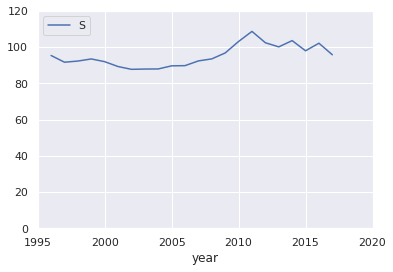

In [61]:
annual_times.plot()
plt.legend('Secs', loc='upper left')
plt.ylim(0, 120)
plt.xlim(1995, 2020)